In [1]:
import random

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("/kaggle/input/online-food-dataset/onlinefoods.csv")

In [3]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
data.shape

(388, 13)

In [5]:
data.drop("Unnamed: 12",axis=1,inplace=True)

In [6]:
data[['Age','Family size']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0,23.0,24.0,26.0,33.0
Family size,388.0,3.280928,1.351025,1.0,2.0,3.0,4.0,6.0


In [7]:
data.nunique()

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 5
Educational Qualifications     5
Family size                    6
latitude                      77
longitude                     76
Pin code                      77
Output                         2
Feedback                       2
dtype: int64

In [8]:
data.replace({"Single":0},inplace=True)
data.replace({"Married":1},inplace=True)
data.replace({"Prefer not to say":None},inplace=True)

In [9]:
data["Marital Status"].unique()

array([0, 1, None], dtype=object)

In [10]:
data['Occupation'].unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [11]:
data['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [12]:
data["Monthly Income"].replace({"No Income":0},inplace=True)
data["Monthly Income"].replace({"Below Rs.10000":5000},inplace=True) # median of income in this range
data["Monthly Income"].replace({"10001 to 25000":17500},inplace=True) # median of income in this range
data["Monthly Income"].replace({"25001 to 50000":37500},inplace=True) # median of income in this range
data["Monthly Income"].replace({"More than 50000":50000},inplace=True)

/tmp/ipykernel_18/822721341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Monthly Income"].replace({"No Income":0},inplace=True)
/tmp/ipykernel_18/822721341.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Monthly Income"].replace({"More than 50000":50000},inplace=True)


In [13]:
data['Monthly Income'].unique()

array([    0,  5000, 50000, 17500, 37500])

In [14]:
data['Educational Qualifications'].unique()

array(['Post Graduate', 'Graduate', 'Ph.D', 'Uneducated', 'School'],
      dtype=object)

In [15]:
data["Educational Qualifications"].replace({"Uneducated":0},inplace=True)
data["Educational Qualifications"].replace({"School":1},inplace=True)
data["Educational Qualifications"].replace({"Graduate":2},inplace=True)
data["Educational Qualifications"].replace({"Post Graduate":3},inplace=True)
data["Educational Qualifications"].replace({"Ph.D":4},inplace=True)

/tmp/ipykernel_18/2957174690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Educational Qualifications"].replace({"Uneducated":0},inplace=True)
/tmp/ipykernel_18/2957174690.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Educational Qualifications"].replace({"Ph.D":4},inplace=Tr

In [16]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [17]:
data['Output'] = LabelEncoder().fit_transform(data['Output'])

In [18]:
data['Feedback'] = LabelEncoder().fit_transform(data['Feedback'])

In [19]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1
1,24,0,0,Student,5000,2,3,12.9770,77.5773,560009,1,1
2,22,1,0,Student,5000,3,3,12.9551,77.6593,560017,1,0
3,22,0,0,Student,0,2,6,12.9473,77.5616,560019,1,1
4,22,1,0,Student,5000,3,4,12.9850,77.5533,560010,1,1


In [20]:
data["is working"] = None

In [21]:
data.loc[data["Occupation"] == "Student"         ,"is working"] = 0
data.loc[data["Occupation"] == "Self Employeed"  ,"is working"] = 1
data.loc[data["Occupation"] == "Employee"        ,"is working"] = 1
data.loc[data["Occupation"] == "House wife"      ,"is working"] = 0

In [22]:
data["is working"].unique()

array([0, 1], dtype=object)

In [23]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1,0
1,24,0,0,Student,5000,2,3,12.9770,77.5773,560009,1,1,0
2,22,1,0,Student,5000,3,3,12.9551,77.6593,560017,1,0,0
3,22,0,0,Student,0,2,6,12.9473,77.5616,560019,1,1,0
4,22,1,0,Student,5000,3,4,12.9850,77.5533,560010,1,1,0


In [24]:
one_enc_df = pd.DataFrame(OneHotEncoder().fit_transform(pd.DataFrame(data["Occupation"])).toarray())
data = pd.concat([data,one_enc_df],axis=1)

In [25]:
data[data["Occupation"] == "Student"].head(1)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1,0,0.0,0.0,0.0,1.0


In [26]:
data[data["Occupation"] == "House wife"].head(1)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
37,32,0,None,House wife,0,2,5,12.982,77.6256,560008,1,0,0,0.0,1.0,0.0,0.0


In [27]:
data[data["Occupation"] == "Employee"].head(1)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
5,27,0,1,Employee,50000,3,2,12.9299,77.6848,560103,1,1,1,1.0,0.0,0.0,0.0


In [28]:
data[data["Occupation"] == "Self Employeed"].head(1)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,0,1,2,3
14,23,0,0,Self Employeed,17500,3,5,12.9438,77.5738,560004,1,1,1,0.0,0.0,1.0,0.0


In [29]:
data.rename(columns={
                     1:"is House wife",
                     0:"is Employee",
                     2:"is Self Employeed",
                     3:"is Student"} ,inplace=True)

In [30]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,is working,is Employee,is House wife,is Self Employeed,is Student
0,20,0,0,Student,0,3,4,12.9766,77.5993,560001,1,1,0,0.0,0.0,0.0,1.0
1,24,0,0,Student,5000,2,3,12.9770,77.5773,560009,1,1,0,0.0,0.0,0.0,1.0
2,22,1,0,Student,5000,3,3,12.9551,77.6593,560017,1,0,0,0.0,0.0,0.0,1.0
3,22,0,0,Student,0,2,6,12.9473,77.5616,560019,1,1,0,0.0,0.0,0.0,1.0
4,22,1,0,Student,5000,3,4,12.9850,77.5533,560010,1,1,0,0.0,0.0,0.0,1.0


In [31]:
data.drop(columns=["Occupation"],inplace=True)

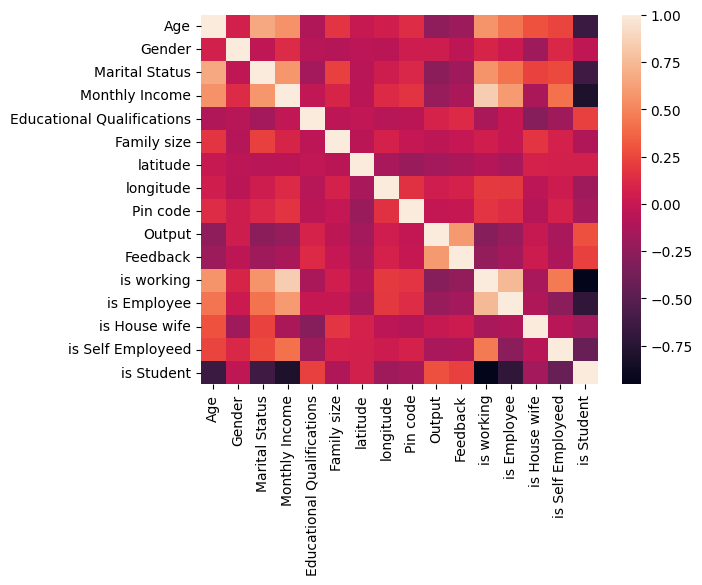

<Figure size 1000x800 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
from seaborn import heatmap
heatmap(data.corr(),annot=False)
plt.figure(figsize=(10,8))
plt.show()

In [33]:
data.isna().sum()

Age                            0
Gender                         0
Marital Status                12
Monthly Income                 0
Educational Qualifications     0
Family size                    0
latitude                       0
longitude                      0
Pin code                       0
Output                         0
Feedback                       0
is working                     0
is Employee                    0
is House wife                  0
is Self Employeed              0
is Student                     0
dtype: int64

In [34]:
data['Marital Status'].fillna(random.randint(0,1),inplace=True)

/tmp/ipykernel_18/1652021365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Marital Status'].fillna(random.randint(0,1),inplace=True)
/tmp/ipykernel_18/1652021365.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Marital Status'].fillna(random.randint(0,1),inplace=True)


In [35]:
data["Marital Status"].isna().sum()

0

In [36]:
X= data.drop(columns=["Output"])
y= data["Output"]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.12)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
knn.score(X_train,y_train)

0.8504398826979472

In [40]:
knn.score(X_test,y_test)

0.6808510638297872

In [41]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [42]:
svm.score(X_train,y_train)

0.7888563049853372

In [43]:
svm.score(X_test,y_test)

0.6808510638297872